In [1]:
#install
!pip install pandas
!pip install chardet

In [2]:
#import
import pandas as pd
import chardet
import json
import os
import glob

In [6]:
#import
import pandas as pd
import chardet
import json
import os
import glob

def read_CSV(passes):
    length=len(passes)
    dfs=[[],[]]
    columns=[]
    encoding=''
    if length==1:
        print(passes[0])
        encoding=check_encoding(passes[0])
        print(encoding)
        df=pd.read_csv(passes[0], encoding=encoding)
        Numpy=df.to_numpy()
        columns=df.columns.values
        dfs[0].append(Numpy)
        dfs[1].append(columns)
    else:
        for i in range(length):
            print(passes[i])
            encoding=check_encoding(passes[i])
            print(encoding)
            df=pd.read_csv(passes[i], encoding=encoding)
            Numpy=df.to_numpy()
            columns=df.columns.values
            dfs[0].append(Numpy)
            dfs[1].append(columns)
    return length,dfs

#エンコードのチェック
def check_encoding(filepath):
    with open(filepath, 'rb') as f:
        c = f.read()
        result = chardet.detect(c)
    encoding=result['encoding']
    if result['encoding'] == 'SHIFT_JIS':
        encoding = 'CP932'
    return encoding

#json形式へ変換
def change_json(length,data,names):
    json_file={}
    json_file["length"]=length
    for i in range(length):
        length2=len(data[i])
        for j in range(length2):
            json_file[names[i][j]]=data[i][j].tolist()
    
    return json.dumps(json_file, ensure_ascii=False, indent=length)


#csvファイルはuploadsフォルダ内の全てを読み込んで検出
def read_folder(passes='..\\uploads'):
    p=passes+'\\*.csv'
    return glob.glob(p)



#uploadsフォルダ内のCSVファイルを読み込む(入力はなし、出力は「CSVの数」,「[CSVファイルの内容][カラム内容]のjsonデータ」)
def read():
    dfs=[]
    names=[[str(1)+"つ目のデータ"],[str(1)+"つ目のカラム"]]
    length,dfs=read_CSV(read_folder())
    if length>1:
        for i in range(length-1):
            names[0].append(str(i)+"つ目のデータ")
            names[1].append(str(i)+"つ目のカラム")
    return change_json(length,dfs,names)



これより下、Seabornのテスト実行

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:

#titanicデータセットを変数dfに代入
df = sns.load_dataset('titanic')
df.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

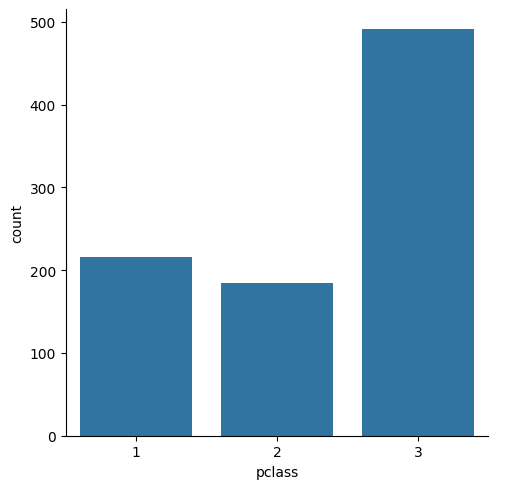

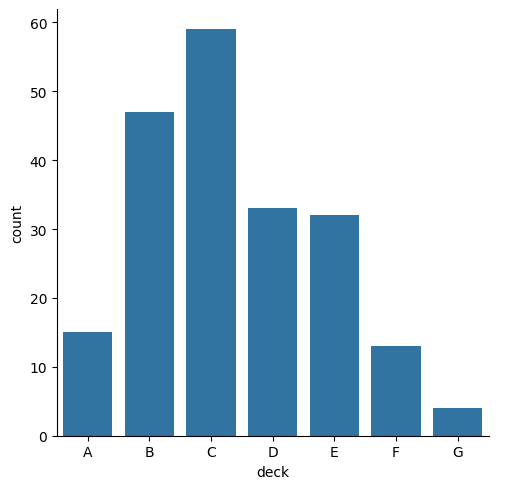

In [14]:
sns.catplot(x="pclass", data=df, kind="count")
sns.catplot(x="deck", data=df, kind="count")

C:\Users\marsh\AppData\Local\Temp\ipykernel_11124\3005736394.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'])


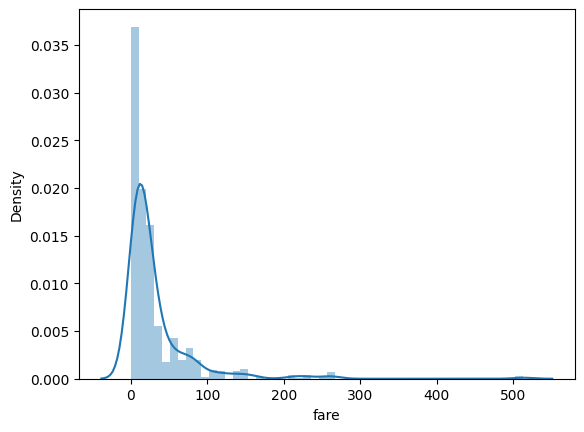

In [17]:
#sns.distplotでヒストグラムを描く
sns.distplot(df['fare'])
plt.show()

c:\Users\marsh\DAT\dev\backend\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\marsh\DAT\dev\backend\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


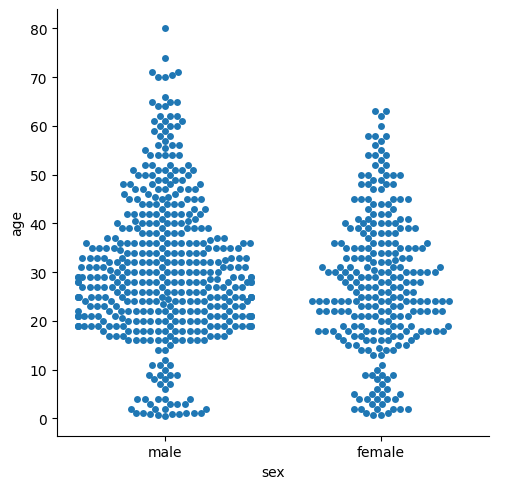

In [23]:
sns.catplot(x='sex', y='age', data=df, kind='swarm')
plt.show()

c:\Users\marsh\DAT\dev\backend\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


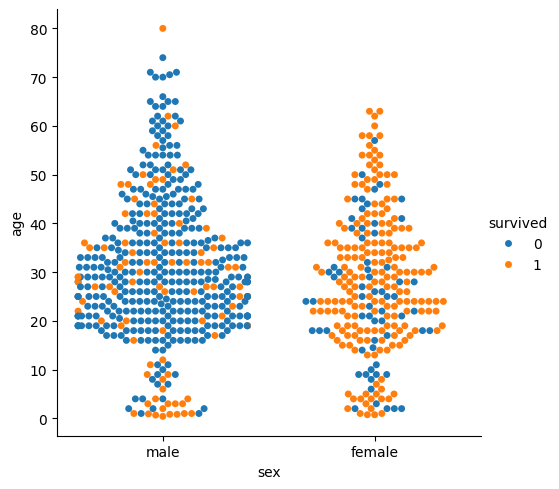

In [24]:

#ラベルごとに分けて表示
sns.catplot(x='sex', y='age', data=df, kind='swarm', hue='survived')
plt.show()
 